In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
df.shape

(1000, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [6]:
df.drop('authorities_contacted', axis=1, inplace=True)

In [7]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

fraud_reported
N    753
Y    247
Name: count, dtype: int64


<Axes: xlabel='fraud_reported', ylabel='count'>

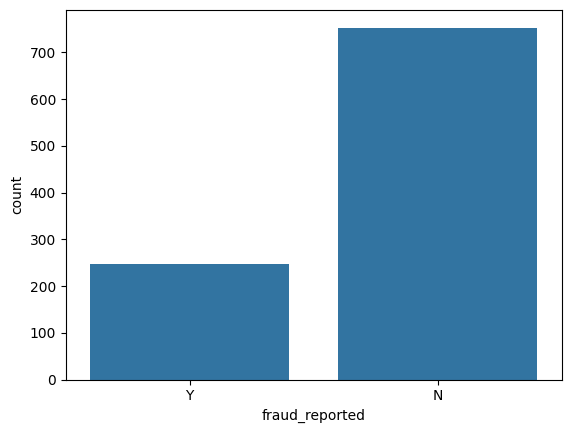

In [8]:
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=df)

In [9]:
df['incident_state'].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

<Axes: xlabel='incident_state', ylabel='count'>

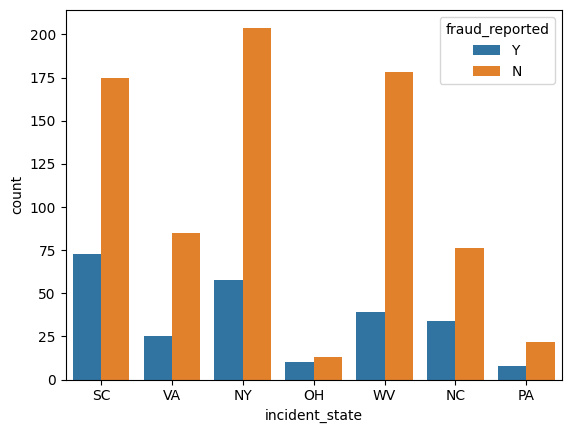

In [10]:
sns.countplot(x='incident_state', data=df, hue='fraud_reported')

<Axes: xlabel='policy_state', ylabel='count'>

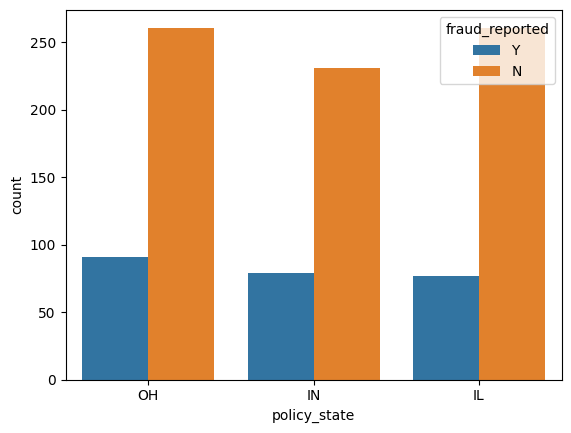

In [11]:
sns.countplot(x='policy_state', data=df, hue='fraud_reported')

incident_type
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: count, dtype: int64

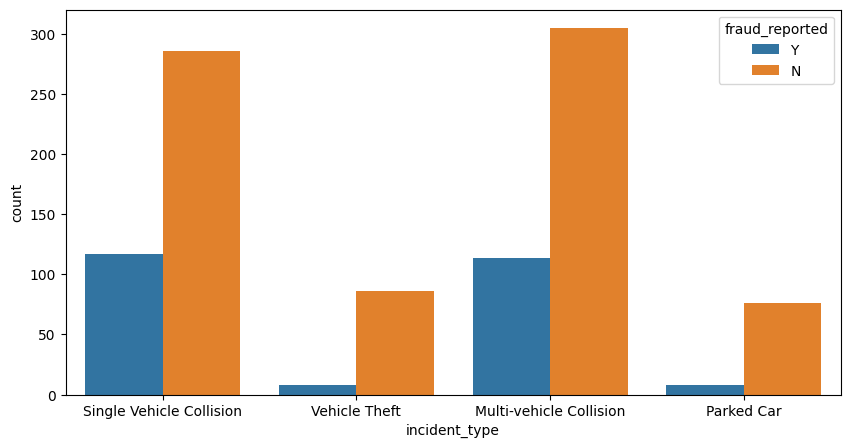

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='incident_type', data=df, hue='fraud_reported')
df['incident_type'].value_counts()


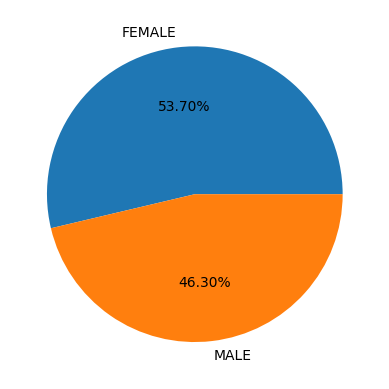

In [13]:

ax = (df['insured_sex'].value_counts())
plt.pie(ax, labels=ax.index, autopct = '%.2f%%')
plt.show()

In [14]:
ax

insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64

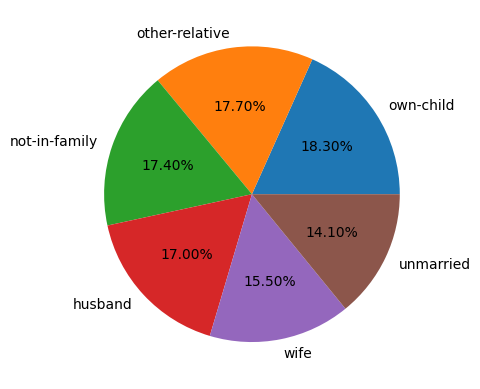

insured_relationship
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: count, dtype: int64

In [15]:
ax1 = df['insured_relationship'].value_counts()

plt.pie(ax1, labels=ax1.index, autopct='%.2f%%')
plt.show()
ax1

In [16]:
df.police_report_available.value_counts()

police_report_available
?      343
NO     343
YES    314
Name: count, dtype: int64

In [17]:
df.property_damage.value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [18]:
df.collision_type.value_counts()

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64

In [19]:
df.replace('?', np.nan, inplace=True)

In [20]:
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [21]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [22]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])


In [23]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])


In [24]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [27]:
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['policy_state'] = le.fit_transform(df['policy_state'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])

In [28]:
df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['incident_location'] = le.fit_transform(df['incident_location'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])


In [29]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


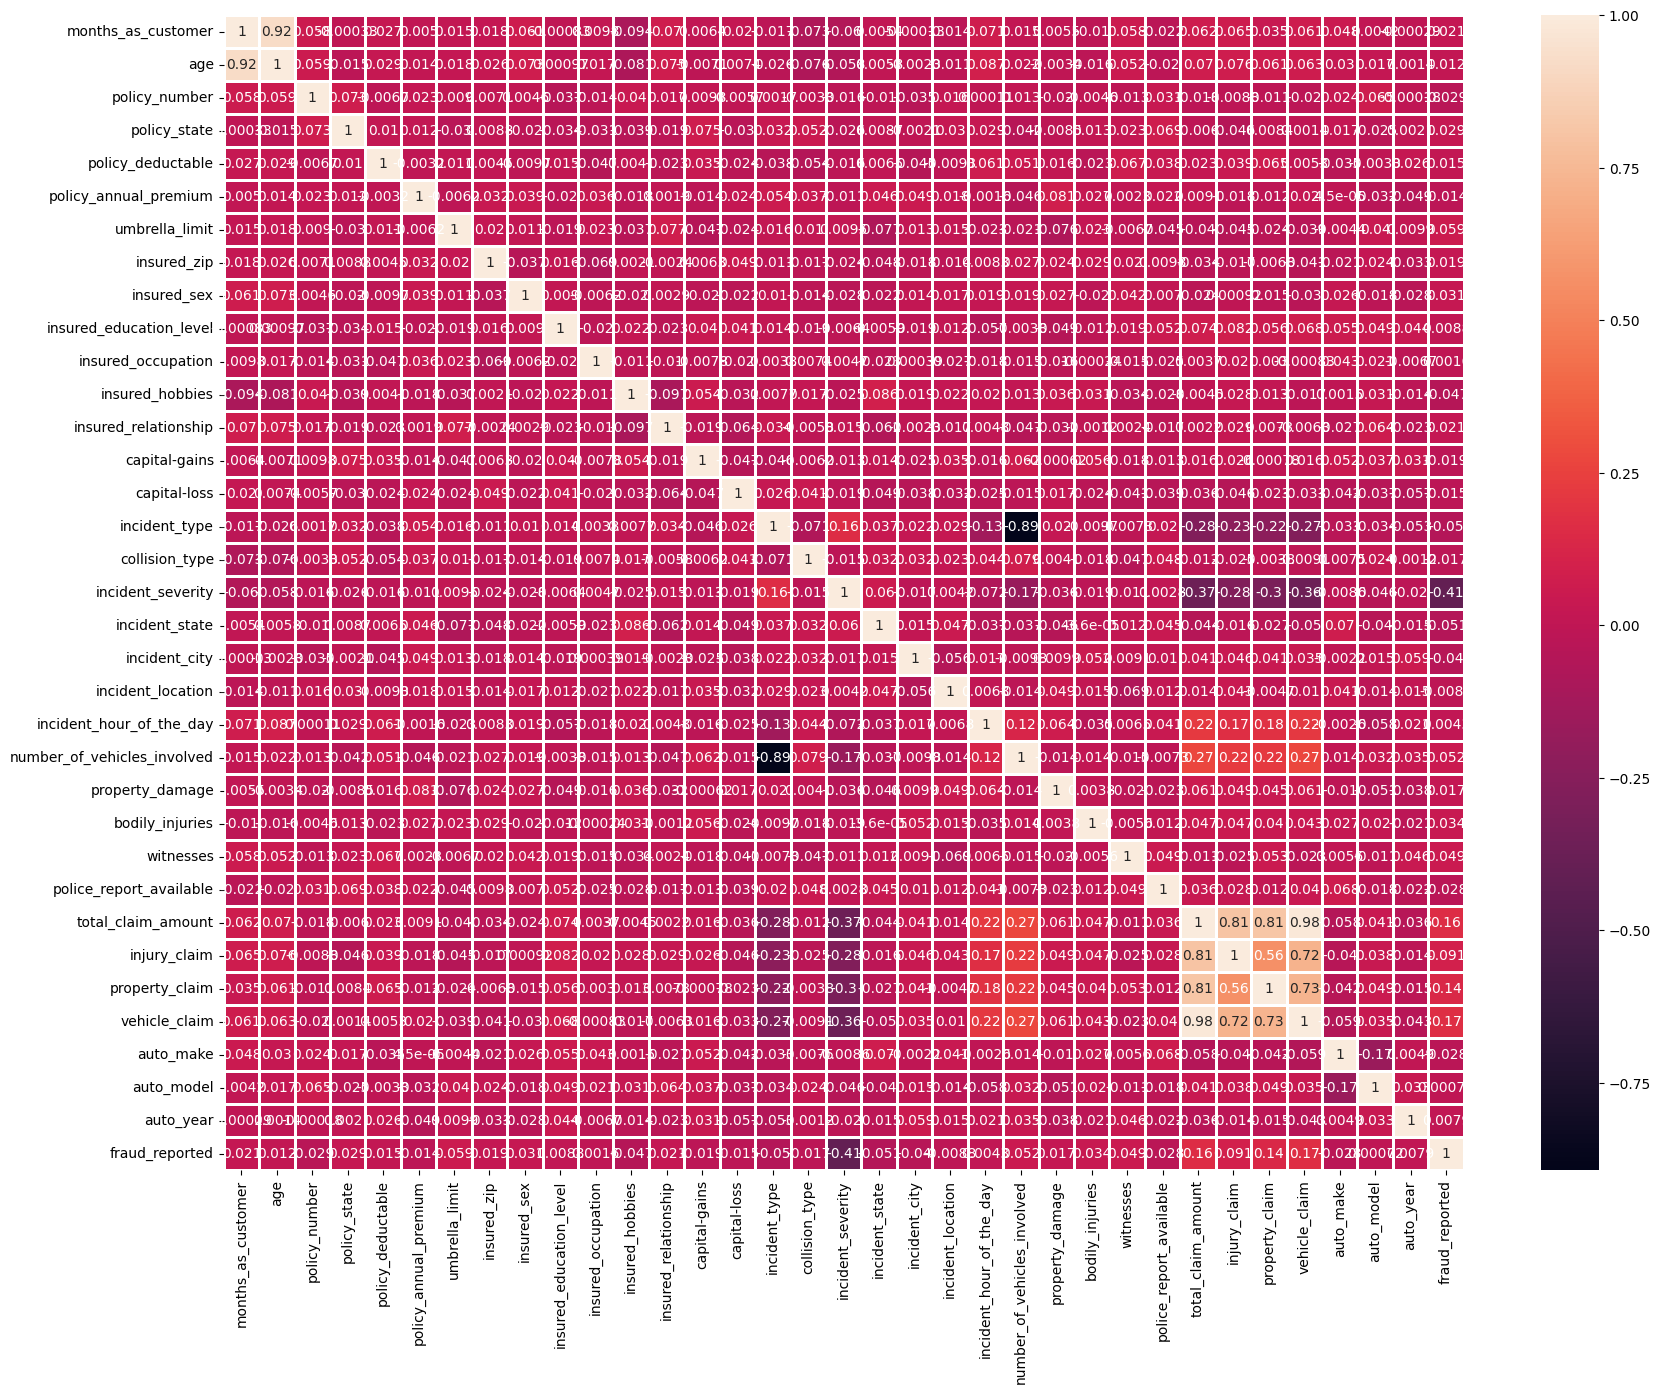

In [30]:
plt.figure(figsize = (20,15))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(data = numeric_df.corr(), annot= True, fmt = '.2g', linewidth = 1)
plt.show()

In [31]:
corrs = numeric_df.corr()['fraud_reported']
columns = corrs[corrs>0.01].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
property_damage                0.017202
policy_deductable              0.014817
age                            0.012143
Name: fraud_reported, dtype: float64

In [32]:
X = df[['vehicle_claim','total_claim_amount','property_claim','injury_claim','umbrella_limit','number_of_vehicles_involved','witnesses','bodily_injuries','insured_sex','policy_state','insured_relationship','months_as_customer']]
y = df.fraud_reported

In [33]:
ax= y.value_counts()
ax

fraud_reported
0    753
1    247
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify= y)

In [35]:
y_train.value_counts()

fraud_reported
0    527
1    173
Name: count, dtype: int64

In [36]:
y_test.value_counts()

fraud_reported
0    226
1     74
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) #Numerical value
X_train_rus, y_train_rus = rus.fit_resample(scaled_X_train, y_train)

y_train_rus.value_counts()

fraud_reported
0    173
1    173
Name: count, dtype: int64

In [39]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1) #Numerical value
X_train_ros, y_train_ros = ros.fit_resample(scaled_X_train, y_train)

y_train_ros.value_counts()

fraud_reported
0    527
1    527
Name: count, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_tr, y_train = smt.fit_resample(scaled_X_train, y_train)
y_train.value_counts()

fraud_reported
0    527
1    527
Name: count, dtype: int64

In [41]:
X_train

,vehicle_claim,total_claim_amount,property_claim,injury_claim,umbrella_limit,number_of_vehicles_involved,witnesses,bodily_injuries,insured_sex,policy_state,insured_relationship,months_as_customer
235,57420,76560,6380,12760,0,3,0,1,1,1,4,428
497,26480,39720,6620,6620,0,4,1,1,1,2,5,0
169,5360,6700,670,670,0,1,0,1,1,1,1,47
511,4920,6560,820,820,0,1,3,2,0,2,0,283
208,43380,65070,14460,7230,3000000,4,3,2,1,1,0,343
...,...,...,...,...,...,...,...,...,...,...,...,...
678,48510,69300,6930,13860,0,3,2,0,0,0,5,276
789,27090,38700,3870,7740,0,1,0,0,0,1,1,169
240,42800,53500,5350,5350,0,1,0,0,0,0,3,249
263,44720,61490,11180,5590,7000000,3,1,1,1,1,2,244


In [42]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print('Accuracy score is {}'.format(accuracy_score(y_test, predictions)))

In [43]:
from sklearn.metrics import classification_report, confusion_matrix


In [44]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_rus, y_train_rus)
log_pred = log_model.predict(scaled_X_test)
modelperformance(log_pred)
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))


Accuracy score is 0.5733333333333334
[[126 100]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.82      0.56      0.66       226
           1       0.32      0.62      0.42        74

    accuracy                           0.57       300
   macro avg       0.57      0.59      0.54       300
weighted avg       0.69      0.57      0.60       300



In [45]:
from sklearn.linear_model import LogisticRegressionCV
logcv_model = LogisticRegressionCV(cv=5,max_iter=1000)
logcv_model.fit(X_train_rus, y_train_rus)
logcv_predict = logcv_model.predict(scaled_X_test)
modelperformance(logcv_predict)
print(confusion_matrix(y_test, logcv_predict))
print(classification_report(y_test, logcv_predict))


Accuracy score is 0.5433333333333333
[[118 108]
 [ 29  45]]
              precision    recall  f1-score   support

           0       0.80      0.52      0.63       226
           1       0.29      0.61      0.40        74

    accuracy                           0.54       300
   macro avg       0.55      0.57      0.51       300
weighted avg       0.68      0.54      0.57       300



In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {
    'criterion' :['gini','entropy'],
    'splitter': ['best','random'],
    'max_depth' : [None, 10,20,30,40,50],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}


grid_search_tree = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=param_grid )
grid_search_tree.fit(X_train_rus, y_train_rus)
tree_predict = grid_search_tree.predict(scaled_X_test)
modelperformance(tree_predict)
print(confusion_matrix(y_test, tree_predict))
print(classification_report(y_test, tree_predict))



Accuracy score is 0.5533333333333333
[[132  94]
 [ 40  34]]
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       226
           1       0.27      0.46      0.34        74

    accuracy                           0.55       300
   macro avg       0.52      0.52      0.50       300
weighted avg       0.64      0.55      0.58       300



In [48]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors' : [3,5,7,9,11],
               'weights' : ['uniform','distance'],
               'algorithm' : ['auto', 'kd_tree']
}

grid_search_neighbor = GridSearchCV(estimator= KNeighborsClassifier(), param_grid=param_grid )
grid_search_neighbor.fit(X_train_rus, y_train_rus)
neighbor_predict = grid_search_neighbor.predict(scaled_X_test)
modelperformance(neighbor_predict)

print(confusion_matrix(y_test, neighbor_predict))
print(classification_report(y_test, neighbor_predict))

Accuracy score is 0.55
[[124 102]
 [ 33  41]]
              precision    recall  f1-score   support

           0       0.79      0.55      0.65       226
           1       0.29      0.55      0.38        74

    accuracy                           0.55       300
   macro avg       0.54      0.55      0.51       300
weighted avg       0.67      0.55      0.58       300



In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [64, 128],
    'max_depth': [10, 20, None],
    'max_features': [2, 3],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rfc = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

rand_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, verbose=1)
rand_search.fit(X_train_rus, y_train_rus)

best_rf = rand_search.best_estimator_
rfc_pred = best_rf.predict(scaled_X_test)
modelperformance(rfc_pred)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy score is 0.48333333333333334


In [50]:

print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))


[[ 98 128]
 [ 27  47]]
              precision    recall  f1-score   support

           0       0.78      0.43      0.56       226
           1       0.27      0.64      0.38        74

    accuracy                           0.48       300
   macro avg       0.53      0.53      0.47       300
weighted avg       0.66      0.48      0.51       300



In [51]:
y_train.value_counts()

fraud_reported
0    527
1    527
Name: count, dtype: int64

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix



xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_rus, y_train_rus)  # Use SMOTE-resampled training data
xgb_pred = xgb.predict(scaled_X_test)

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


d:\My Courses\Projects\New folder\Insurance-Claim-Prediction\dvenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:02:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[122 104]
 [ 29  45]]
              precision    recall  f1-score   support

           0       0.81      0.54      0.65       226
           1       0.30      0.61      0.40        74

    accuracy                           0.56       300
   macro avg       0.55      0.57      0.53       300
weighted avg       0.68      0.56      0.59       300



In [53]:
#!pip install xgboost

In [54]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

# Calculate proper scale_pos_weight
neg, pos = np.bincount(y_train_rus)
scale_pos_weight = neg / pos

# Define parameter grid
xgb_param_grid = {
    'n_estimators': [20, 40, 60, 80, 100],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [1, 3, 4, 5]
}

# Use the calculated scale_pos_weight
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ),
    param_grid=xgb_param_grid,
    scoring='f1_weighted',  # or 'recall' for better rare event detection
    cv=5,
    n_jobs=-1
)

# Fit the model
xgb_grid.fit(X_train_rus, y_train_rus)

# Predict on test data
xgb_predict = xgb_grid.predict(scaled_X_test)


d:\My Courses\Projects\New folder\Insurance-Claim-Prediction\dvenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:02:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [55]:
print(confusion_matrix(y_test, xgb_predict))
print(classification_report(y_test, xgb_predict))

[[110 116]
 [ 22  52]]
              precision    recall  f1-score   support

           0       0.83      0.49      0.61       226
           1       0.31      0.70      0.43        74

    accuracy                           0.54       300
   macro avg       0.57      0.59      0.52       300
weighted avg       0.70      0.54      0.57       300



In [56]:
modelperformance(xgb_predict)

Accuracy score is 0.54


In [57]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(scaled_X_train, y_train)

# 2. Compute scale_pos_weight
neg, pos = np.bincount(y_train_smote)
scale = neg / pos

# 3. Define param grid and classifier
xgb_params = {
    'n_estimators': [40, 60, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5]
}

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,
    random_state=42
)

# 4. Grid Search with weighted F1
grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1
)

# 5. Train
grid.fit(X_train_smote, y_train_smote)
best_xgb = grid.best_estimator_

# 6. Predict
y_pred = best_xgb.predict(scaled_X_test)
y_probs = best_xgb.predict_proba(scaled_X_test)[:, 1]

# 7. Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))


ValueError: Found input variables with inconsistent numbers of samples: [700, 1054]

In [ ]:
modelperformance(y_pred)

Accuracy score is 0.32


In [ ]:
import pickle

with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb, f)


In [ ]:
with open('best_xgb_model.pkl', 'rb') as f:
    xgb_loaded = pickle.load(f)

In [ ]:
xgb_loaded_pred = xgb_loaded.predict(scaled_X_test)
modelperformance(xgb_loaded_pred)

Accuracy score is 0.5633333333333334


In [58]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,2,500/1000,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,2014-01-05,0,100/300,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,2003-02-17,2,250/500,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,2011-11-18,0,500/1000,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [59]:
df.to_csv("output.csv", index=False)